In [126]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mall-customers-csv/Mall_Customers.csv


In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')         

In [128]:
df=pd.read_csv(r'/kaggle/input/mall-customers-csv/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Univariate analysis

Univariate analysis is a statistical method that involves the analysis of a single variable at a time. In other words, it focuses on examining the distribution and characteristics of a single variable without considering relationships with other variables. The primary goal of univariate analysis is to describe and summarize the main features of a single variable.

In [129]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


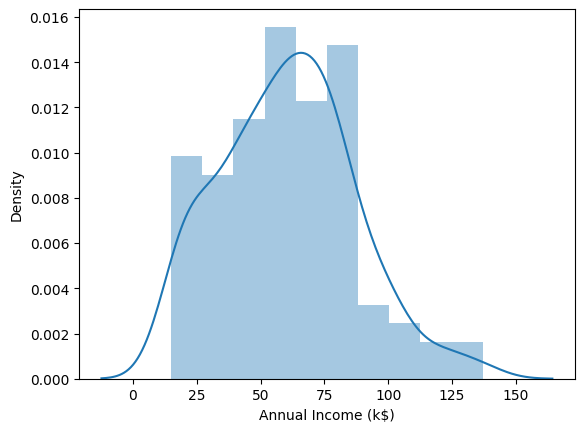

In [130]:
sns.distplot(df['Annual Income (k$)']);

In [131]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

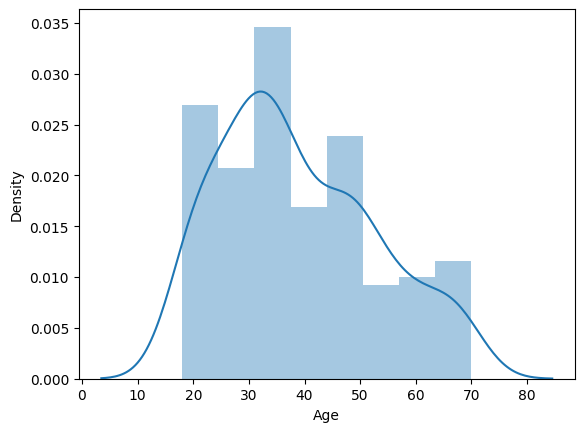

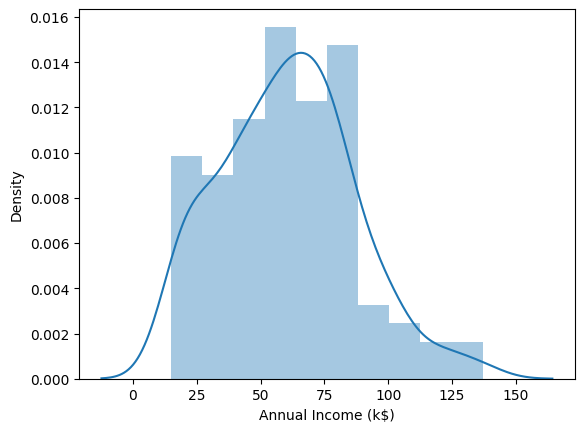

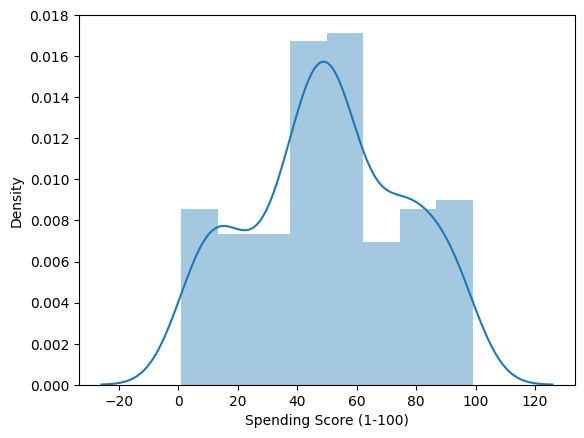

In [132]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

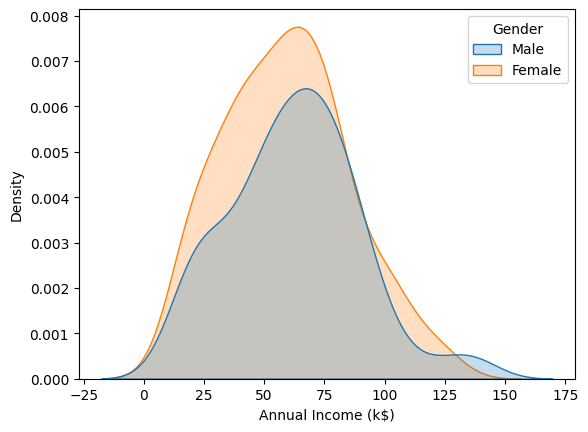

In [133]:
sns.kdeplot(data=df, x='Annual Income (k$)', shade=True, hue='Gender',legend=True)

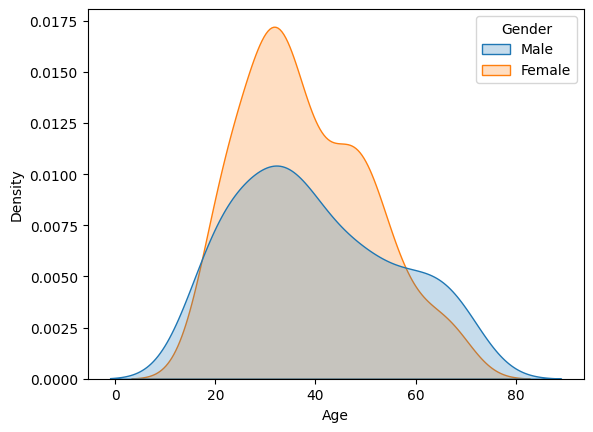

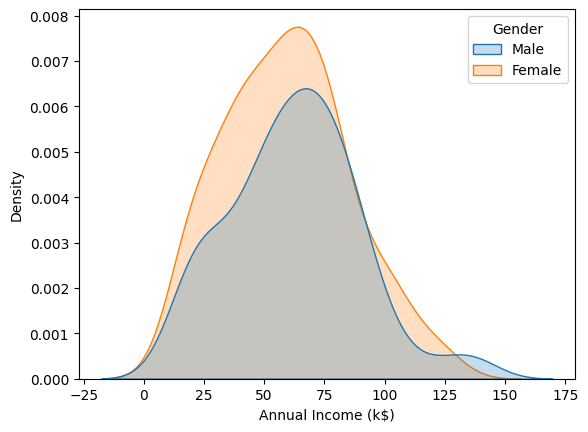

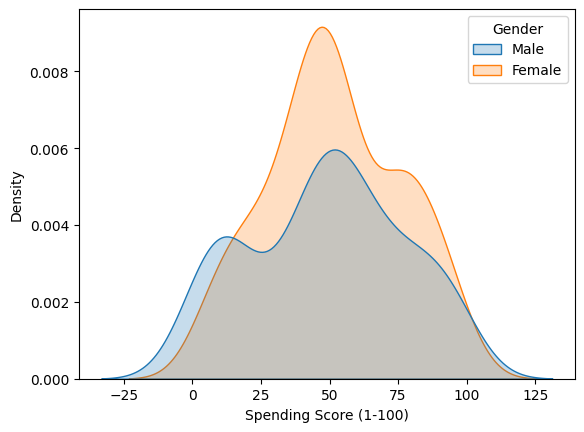

In [134]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(data=df, x=i, shade=True, hue='Gender',legend=True)

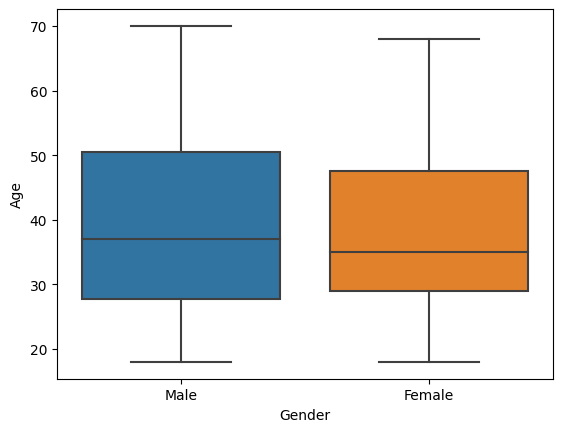

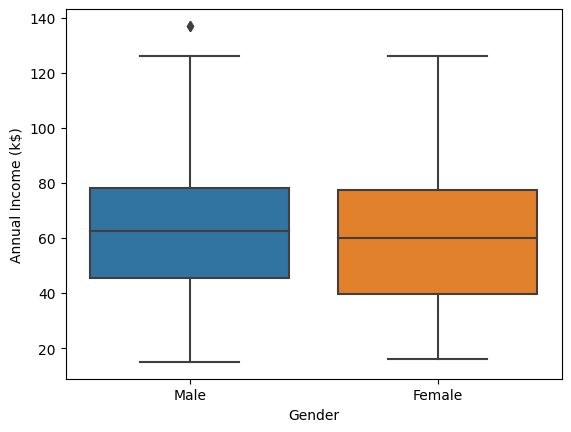

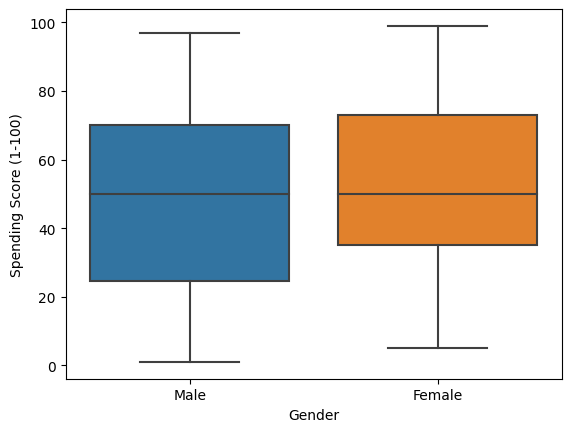

In [135]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df, x='Gender',y=i)


In [136]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

# Bivariate analysis

* Bivariate analysis is a statistical analysis technique that involves the simultaneous examination of two variables to explore the relationships between them.
* The primary goal of bivariate analysis is to identify patterns, correlations, or associations between the two variables. 
* This type of analysis is fundamental in understanding how changes in one variable may be related to changes in another.

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

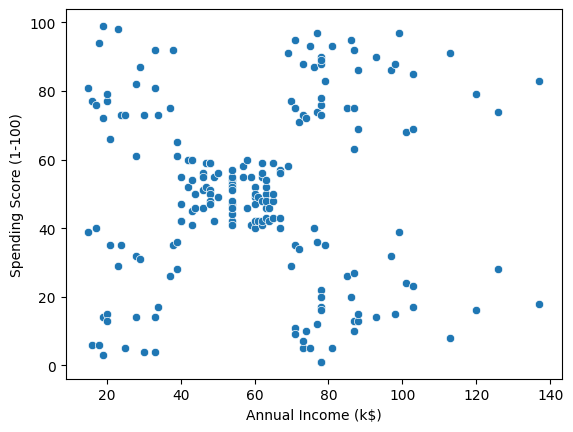

In [137]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)')

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

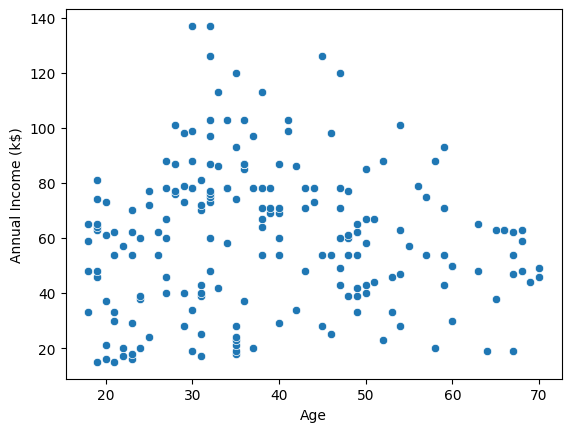

In [138]:
sns.scatterplot(data=df,x='Age',y='Annual Income (k$)')

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

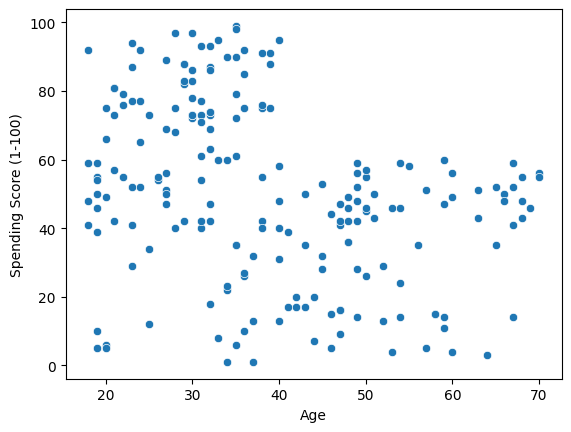

In [139]:
sns.scatterplot(data=df,x='Age',y='Spending Score (1-100)')

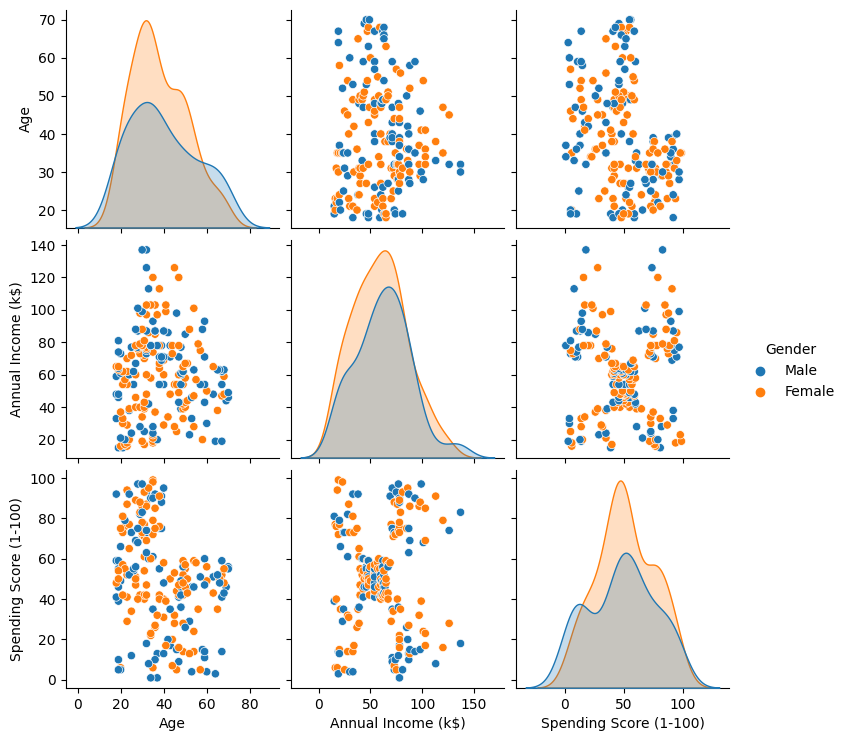

In [140]:
#df=df.drop('CustomerID',axis=1)
sns.pairplot(df,hue='Gender')

In [141]:
df.groupby('Gender')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [142]:
#Find the correlation between all of these 

In [143]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr()
correlation_matrix

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


Spending score and annual income are positively correlated

<Axes: >

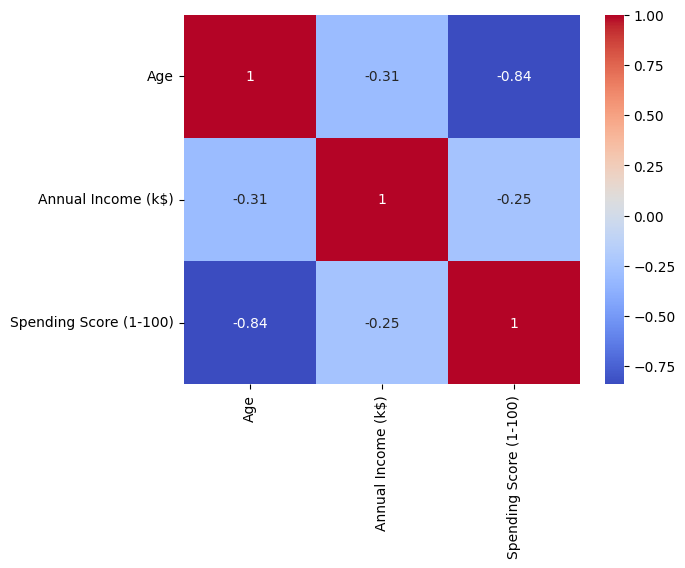

In [144]:
sns.heatmap(correlation_matrix.corr(),annot=True,cmap='coolwarm')

# Clustering - univariate , Bivariate , Multivariate

In [145]:
from sklearn.cluster import KMeans
clustering1 = KMeans(n_clusters = 3)

In [146]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [147]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [148]:
df['Income cluster'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [149]:
#Now we will do some summary statistics  around that univariate cluster

In [150]:
#Lets see how many of our customers fall in each cluster
df['Income cluster'].value_counts()

Income cluster
0    90
1    74
2    36
Name: count, dtype: int64

In [151]:
clustering1.inertia_


23517.330930930926

 Inertia is a measure of how compact (small and easy) the clusters are. Lower inertia values generally indicate better-defined clusters.

In [152]:
inertia_scores = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [153]:
inertia_scores

[137277.28,
 48660.88888888889,
 23528.152173913055,
 13278.112713472488,
 8481.496190476191,
 5081.48466026727,
 3931.988095238096,
 2822.4996947496948,
 2173.287445887446,
 1758.1453823953823]

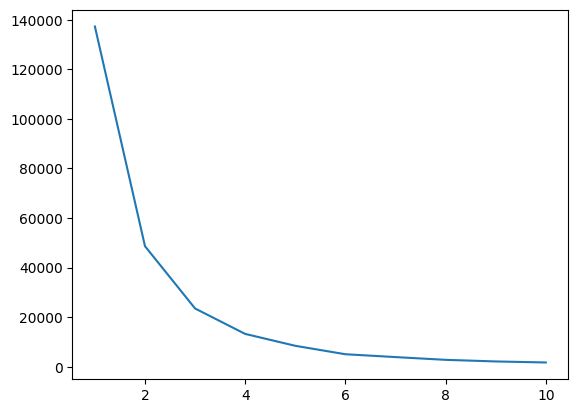

In [154]:
plt.plot(range(1,11),inertia_scores)

In [155]:
df.groupby('Income cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income cluster,,,
0,38.722222,67.088889,50.000000
1,39.500000,33.486486,50.229730
2,37.833333,99.888889,50.638889


In [156]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income cluster'],
      dtype='object')

# Bivariate clustering

In [158]:
clustering2 = KMeans(n_clusters = 5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] = clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income cluster,Spending and Income Cluster
0,Male,19,15,39,1,4
1,Male,21,15,81,1,2
2,Female,20,16,6,1,4
3,Female,23,16,77,1,2
4,Female,31,17,40,1,4


In [159]:
clustering2.inertia_

44448.45544793371

In [160]:
inertia_scores2 = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores2.append(kmeans.inertia_)
    

In [161]:
inertia_scores2

[269981.2800000001,
 183653.3289473684,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30241.34361793659,
 25018.576334776335,
 21862.09267218289,
 19740.010370359305]

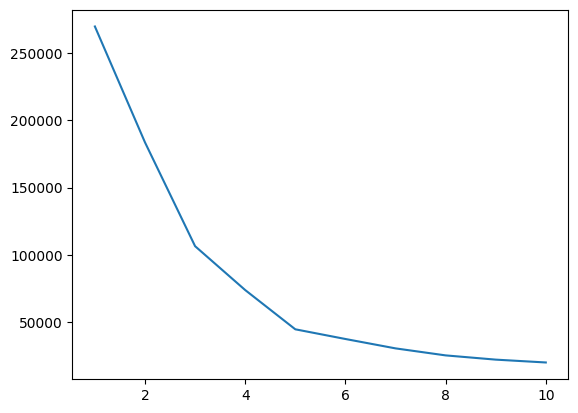

In [162]:
plt.plot(range(1,11),inertia_scores2)

In [163]:
#As seen above the elbow point is 5 , hence number of clusters we can take in this bivariate analysis is 5

In [164]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,32.692308,86.538462,82.128205
1,41.114286,88.200000,17.114286
2,25.272727,25.727273,79.363636
3,42.716049,55.296296,49.518519
4,45.217391,26.304348,20.913043


In [168]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns=['x','y']

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

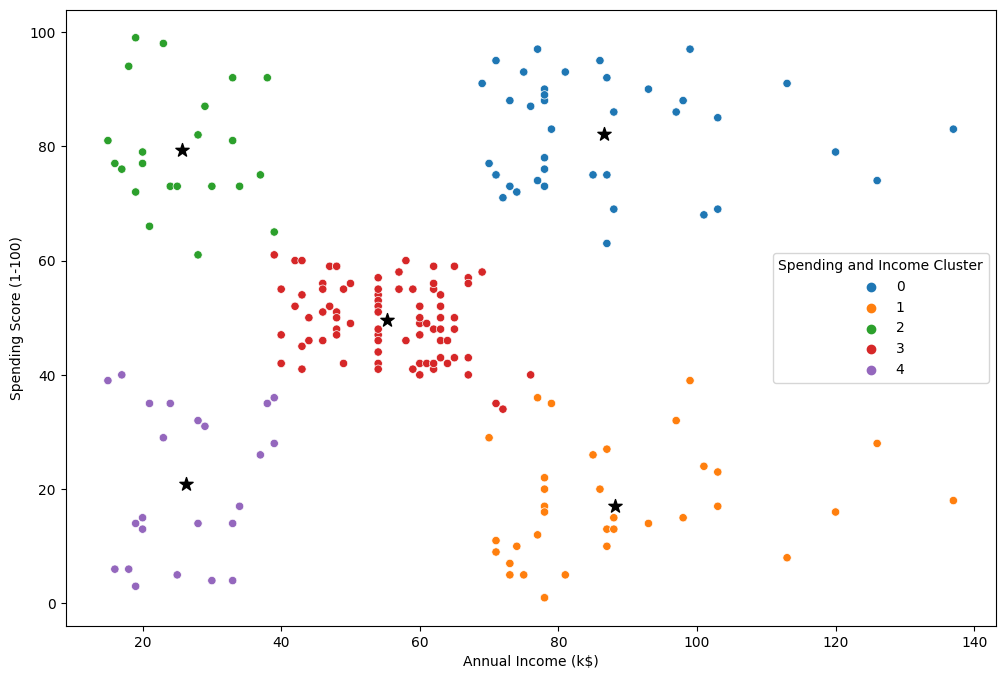

In [172]:
plt.figure(figsize=(12,8))
plt.scatter(x=centers['x'],y=centers['y'],color='black',marker='*',s=100)
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue = 'Spending and Income Cluster',palette='tab10')

In [173]:
pd.crosstab (df [ 'Spending and Income Cluster'], df [ 'Gender' ], normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.538462,0.461538
1,0.457143,0.542857
2,0.590909,0.409091
3,0.592593,0.407407
4,0.608696,0.391304


In [174]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,32.692308,86.538462,82.128205
1,41.114286,88.200000,17.114286
2,25.272727,25.727273,79.363636
3,42.716049,55.296296,49.518519
4,45.217391,26.304348,20.913043


# Cluster 0 wiil be ideal for our marketing department to run campaigns 

In [176]:
# Multivariate Clustering

In [178]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [181]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,1,4,True
1,21,15,81,1,2,True
2,20,16,6,1,4,False
3,23,16,77,1,2,False
4,31,17,40,1,4,False


In [183]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [190]:
dff = scale.fit_transform(dff)
dff = pd.DataFrame (dff)
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


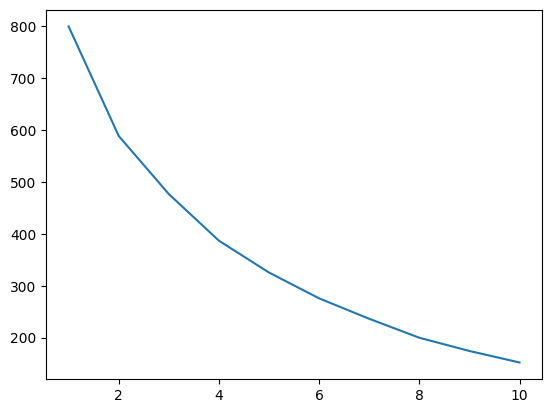

In [191]:
intertia_scores3=[]
for i in range (1,11):
    kmeans3= KMeans (n_clusters=i)
    kmeans3.fit (dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range (1,11), intertia_scores3)

In [192]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income cluster,Spending and Income Cluster
0,Male,19,15,39,1,4
1,Male,21,15,81,1,2
2,Female,20,16,6,1,4
3,Female,23,16,77,1,2
4,Female,31,17,40,1,4
...,...,...,...,...,...,...
195,Female,35,120,79,2,0
196,Female,45,126,28,2,1
197,Male,32,126,74,2,0
198,Male,32,137,18,2,1
